In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)   #2D array can be reshaped into 1D array using reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test[:5]
     

array([3, 8, 8, 0, 6], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
     

In [10]:
def plot_sample(x, y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

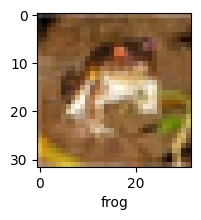

In [11]:
plot_sample(x_train, y_train, 0)

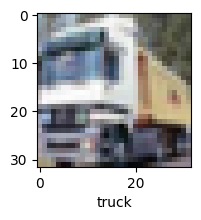

In [12]:
plot_sample(x_train, y_train, 1)

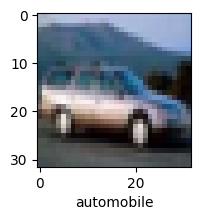

In [13]:

plot_sample(x_train, y_train, 4)

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
#Define network architecture of your model
annmodel = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

C:\Users\SarahsBox\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#compile model using optimizer
annmodel.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
annmodel.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.2958 - loss: 1.9562
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4066 - loss: 1.6723
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4476 - loss: 1.5672
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4646 - loss: 1.5214
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4835 - loss: 1.4663


In [19]:
#define cnn network architecture 
cnnmodel = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\SarahsBox\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:

cnnmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [21]:
history=cnnmodel.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.3833 - loss: 1.6982 - val_accuracy: 0.5637 - val_loss: 1.2311
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6080 - loss: 1.1304 - val_accuracy: 0.6268 - val_loss: 1.0551
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6615 - loss: 0.9735 - val_accuracy: 0.6413 - val_loss: 1.0322
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6936 - loss: 0.8827 - val_accuracy: 0.6772 - val_loss: 0.9270
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7198 - loss: 0.8096 - val_accuracy: 0.6794 - val_loss: 0.9267
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7403 - loss: 0.7525 - val_accuracy: 0.6808 - val_loss: 0.9231
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7586 - loss: 0.6989 - val_accuracy: 0.6952 - val_loss: 0.8980
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7819 -

In [22]:
cnnmodel.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6937 - loss: 0.9424


[0.9470859169960022, 0.6927000284194946]

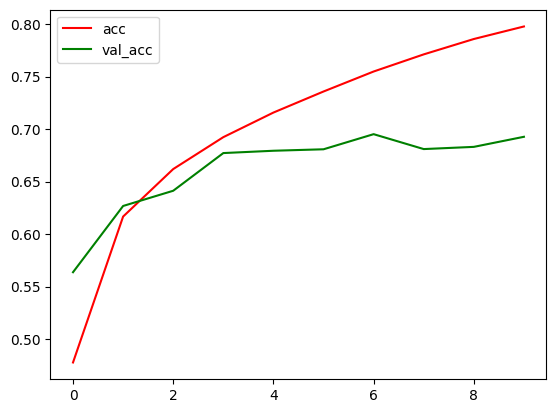

In [23]:
plt.plot(history.history['accuracy'],label='acc', color='red')
plt.plot(history.history['val_accuracy'],label='val_acc', color='green')
plt.legend()

In [26]:
y_pred = cnnmodel.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[3.5116117e-04, 1.1070988e-06, 1.9118220e-03, 9.1145241e-01,
        2.5181836e-05, 7.2180075e-03, 3.1825572e-02, 1.6388489e-04,
        4.7042456e-02, 8.3974082e-06],
       [5.1104720e-04, 2.2428010e-02, 3.6526501e-06, 8.1396854e-07,
        2.7541678e-09, 6.1813211e-08, 5.7078592e-10, 1.0675523e-10,
        9.7681367e-01, 2.4282104e-04],
       [1.2445539e-01, 4.0099037e-01, 2.8511528e-02, 1.8572126e-02,
        6.7765606e-03, 3.8809220e-03, 3.0941882e-03, 8.1843027e-04,
        3.9128795e-01, 2.1612490e-02],
       [8.8183540e-01, 3.9333599e-03, 8.5458960e-03, 4.1793385e-03,
        2.4056959e-03, 3.6438043e-06, 3.7371745e-05, 6.9200169e-06,
        9.9045344e-02, 6.9323296e-06],
       [5.0177835e-07, 7.1878230e-06, 2.4960937e-03, 1.8346791e-01,
        1.7463807e-02, 5.7922048e-04, 7.9597223e-01, 2.3081569e-07,
        1.2246225e-05, 6.3662640e-07]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

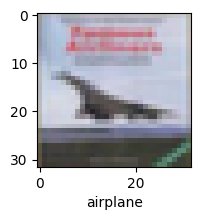

In [30]:
plot_sample(x_test, y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'

In [32]:
cnnmodel.save('cnnmodel.h5')